Data Loading
• Read Toronto weather data from a GitHub repository.

In [128]:
import pandas as pd
df=pd.read_csv("Weather_Data.csv")
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


2. Data Preprocessing
• Convert the Date/Time column to datetime type.

In [129]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M')
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


• Set the datetime column as the index for easy time-series access.

In [130]:
df.set_index('Date/Time', inplace=True)
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


3. Feature Selection
• Select key columns: Temperature, Relative Humidity, Wind Speed, Weather Condition.

In [131]:
df_selected = df[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Weather']]
df_selected

,Temp_C,Rel Hum_%,Wind Speed_km/h,Weather
Date/Time,,,,
2012-01-01 00:00:00,-1.8,86,4,Fog
2012-01-01 01:00:00,-1.8,87,4,Fog
2012-01-01 02:00:00,-1.8,89,7,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,88,6,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,88,7,Fog
...,...,...,...,...
2012-12-31 19:00:00,0.1,81,30,Snow
2012-12-31 20:00:00,0.2,83,24,Snow
2012-12-31 21:00:00,-0.5,93,28,Snow


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temp_C            8784 non-null   float64
 1   Dew Point Temp_C  8784 non-null   float64
 2   Rel Hum_%         8784 non-null   int64  
 3   Wind Speed_km/h   8784 non-null   int64  
 4   Visibility_km     8784 non-null   float64
 5   Press_kPa         8784 non-null   float64
 6   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 549.0+ KB


4. Statistical Analysis
• Calculate average temperature and maximum wind speed.

In [133]:
print(f"average temperature: {df['Temp_C'].mean()}")
print(f"maximum wind speed : {df['Wind Speed_km/h'].max()}")



average temperature: 8.798144353369763
maximum wind speed : 83


• Identify the warmest and most humid day recorded.

In [134]:
daily_stats = df_selected.resample('D').agg({'Temp_C':'mean', 'Rel Hum_%':'mean'})
hottest_day = daily_stats['Temp_C'].idxmax()
most_humid_day = daily_stats['Rel Hum_%'].idxmax()
print(f"Hottest day: {hottest_day.date()}, Temp: {daily_stats.loc[hottest_day, 'Temp_C']:.2f}°C")
print(f"Most humid day: {most_humid_day.date()}, Humidity: {daily_stats.loc[most_humid_day, 'Rel Hum_%']:.2f}°C")
print(daily_stats.head())
print(" humid day:", most_humid_day.date())

Hottest day: 2012-06-21, Temp: 28.37°C
Most humid day: 2012-03-16, Humidity: 95.79°C
               Temp_C  Rel Hum_%
Date/Time                       
2012-01-01   0.629167  86.125000
2012-01-02   0.041667  63.083333
2012-01-03 -14.416667  54.791667
2012-01-04 -13.645833  62.875000
2012-01-05  -6.750000  70.000000
 humid day: 2012-03-16


5. Rainfall Column Creation
• Detect rainfall or snowfall by analyzing the text in the Weather column and create a binary rainfall column (0 = No, 1 = Rain/Snow).

In [135]:
df['Rain']=df['Weather'].apply(lambda x:1 if 'Rain' in str(x) or 'Drizzle' in str(x) or 'Snow' in str(x) else 0)
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Rain
Date/Time,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,0
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,0


6. Specific Time Range Analysis
• Filter the dataset for January 2012.

In [136]:
df[df.index.month_name() == "January"]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Rain
Date/Time,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,0
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,0
...,...,...,...,...,...,...,...,...
2012-01-31 19:00:00,-7.7,-10.9,78,19,1.6,101.14,Snow,1
2012-01-31 20:00:00,-7.4,-10.7,77,20,1.6,101.09,Snow,1
2012-01-31 21:00:00,-7.1,-10.5,77,20,12.9,101.02,Cloudy,0


In [137]:
january_data = df_selected.loc['2012-01']
january_data

,Temp_C,Rel Hum_%,Wind Speed_km/h,Weather
Date/Time,,,,
2012-01-01 00:00:00,-1.8,86,4,Fog
2012-01-01 01:00:00,-1.8,87,4,Fog
2012-01-01 02:00:00,-1.8,89,7,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,88,6,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,88,7,Fog
...,...,...,...,...
2012-01-31 19:00:00,-7.7,78,19,Snow
2012-01-31 20:00:00,-7.4,77,20,Snow
2012-01-31 21:00:00,-7.1,77,20,Cloudy


7. Visualization
• Plot daily temperature as a line chart.

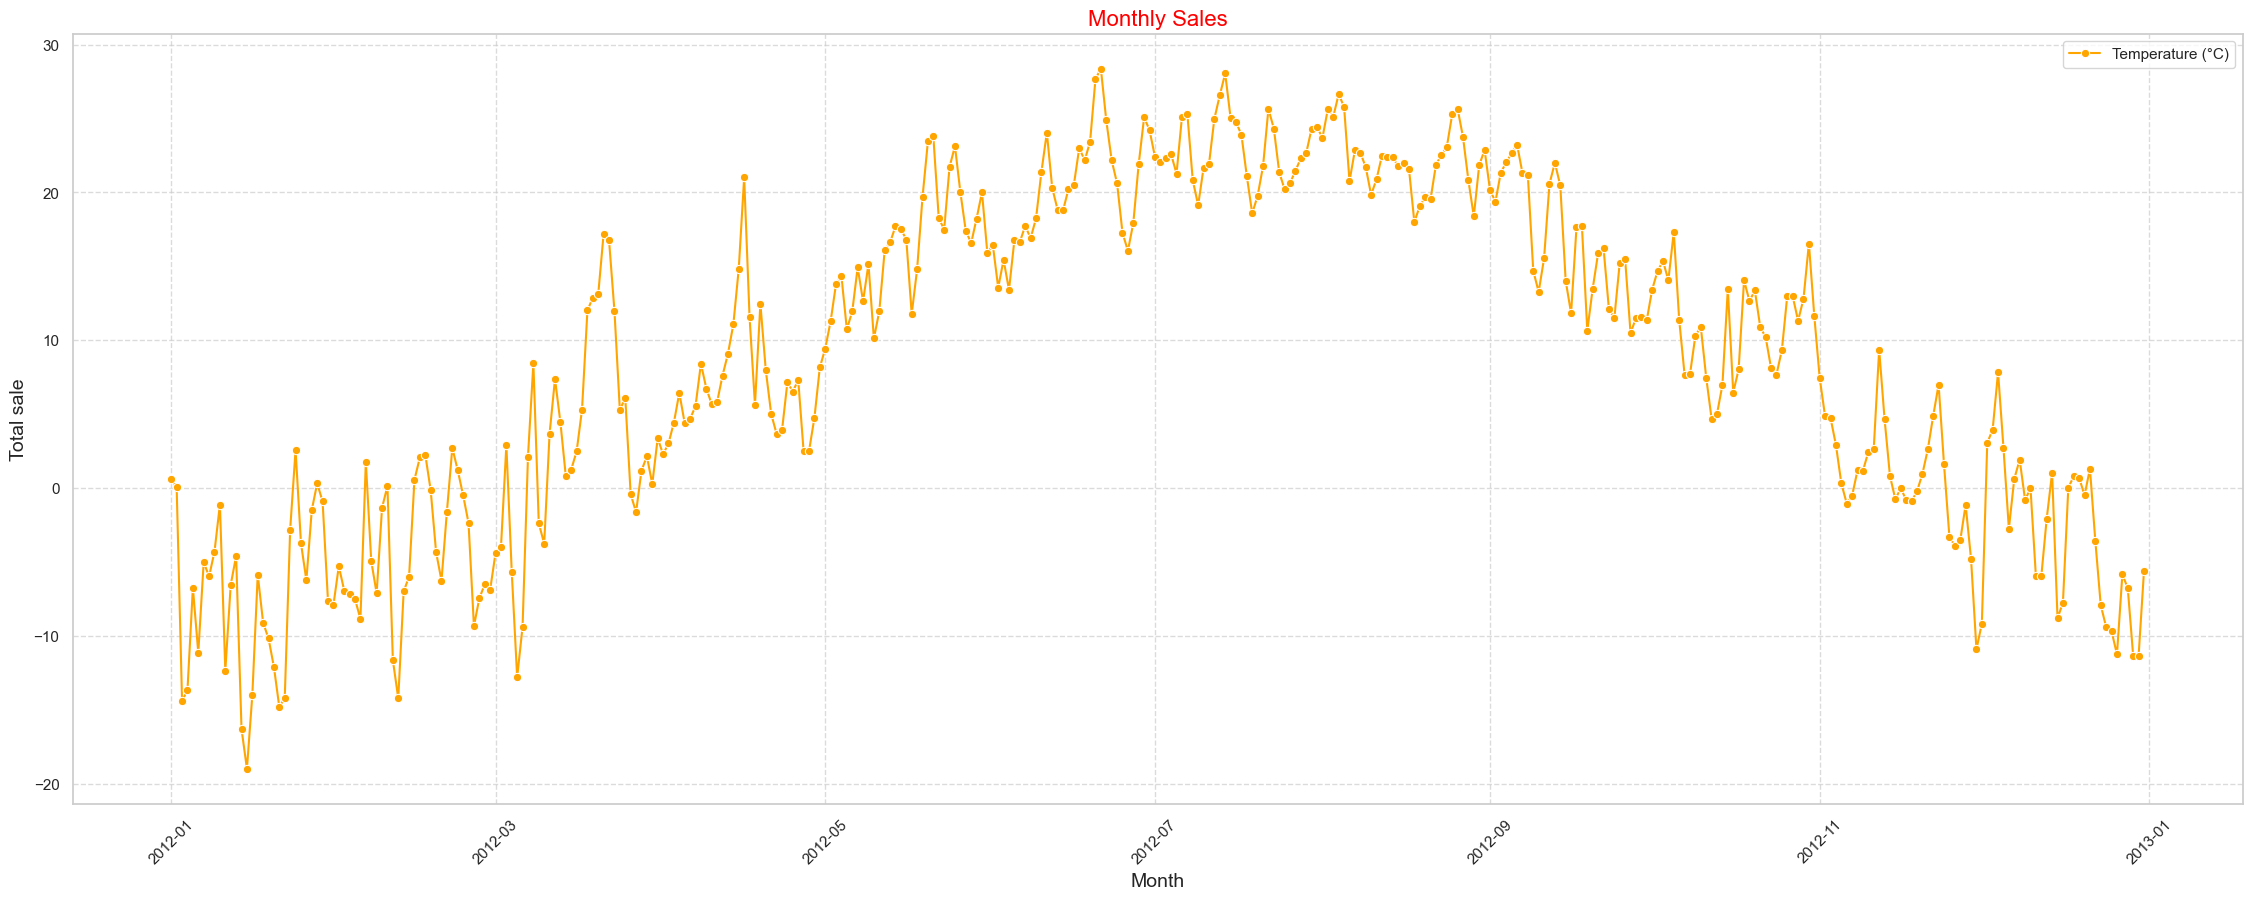

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

month=df['Temp_C'].resample('D').mean().reset_index()
plt.figure(figsize=(28,10))
sns.lineplot(data=month,x='Date/Time', y='Temp_C', marker='o', color='orange', label="Temperature (°C)")
plt.title("Monthly Sales", color="red", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total sale", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.show()

•	plot rainfall and snowfall events (0/1) as a bar chart, showing the number of rainy and snowy days in each time period (e.g., weekly or monthly)

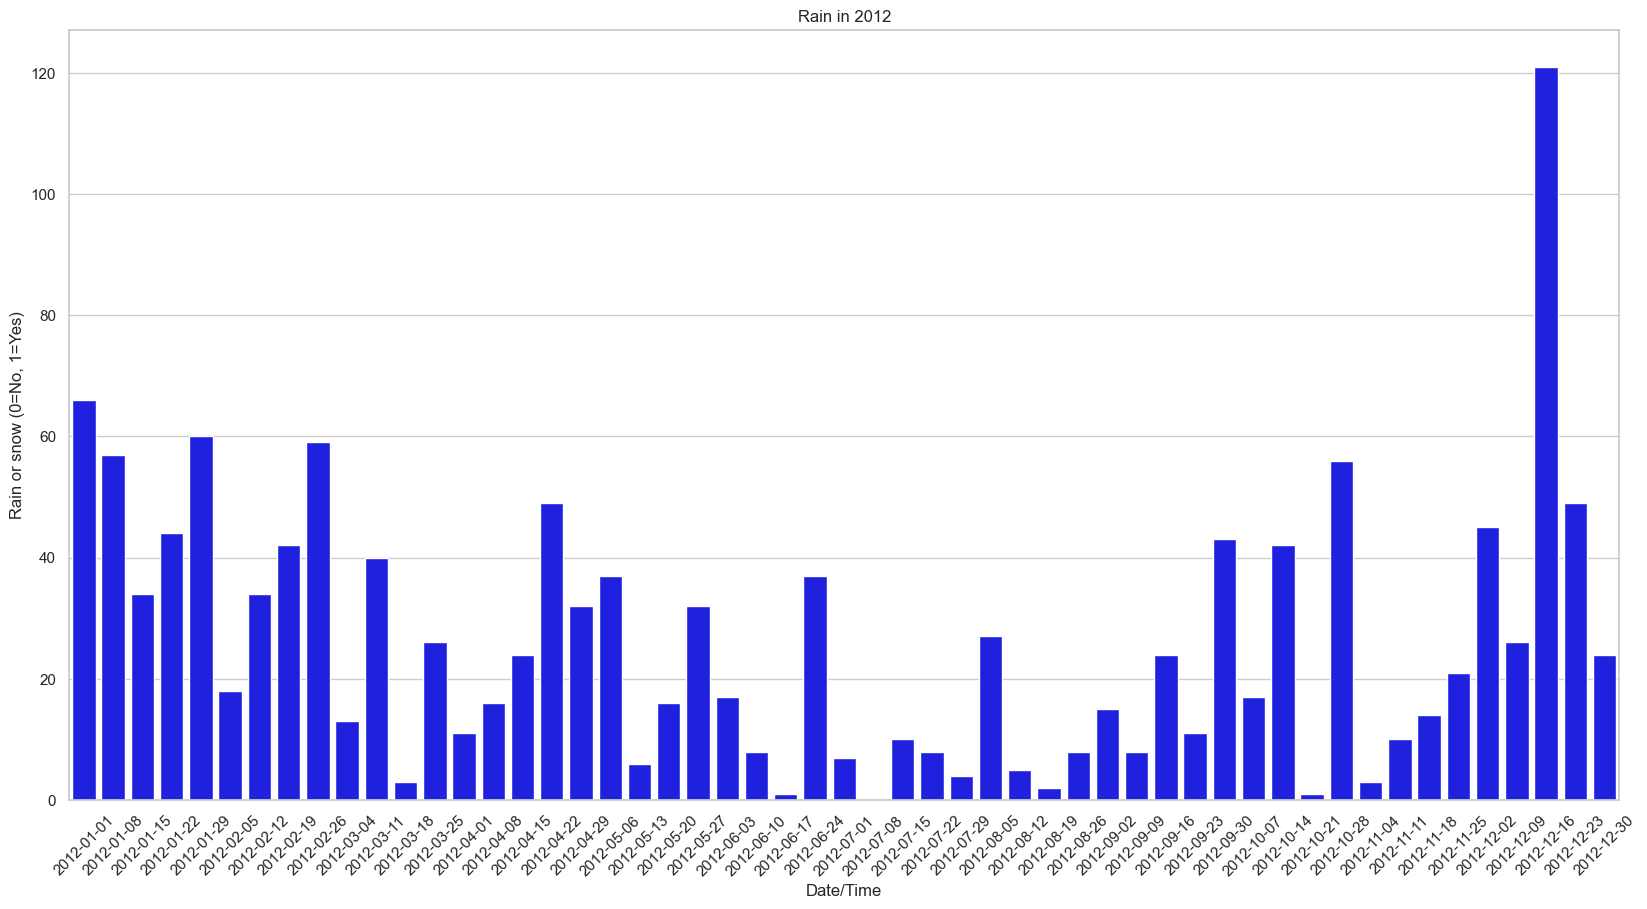

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
daily_rain = df['Rain'].resample('7D').sum().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='Date/Time', y="Rain", data=daily_rain, color="blue")
plt.xlabel("Date/Time")
plt.ylabel("Rain or snow (0=No, 1=Yes)")
plt.title("Rain in 2012")
plt.xticks(rotation=45)  
plt.show()

8.	Combined Figure
•	Create a single figure with two subplots:
•	The first subplot shows the temperature line chart.
•	The second subplot shows the weekly or monthly rainy and snowy days as a bar chart


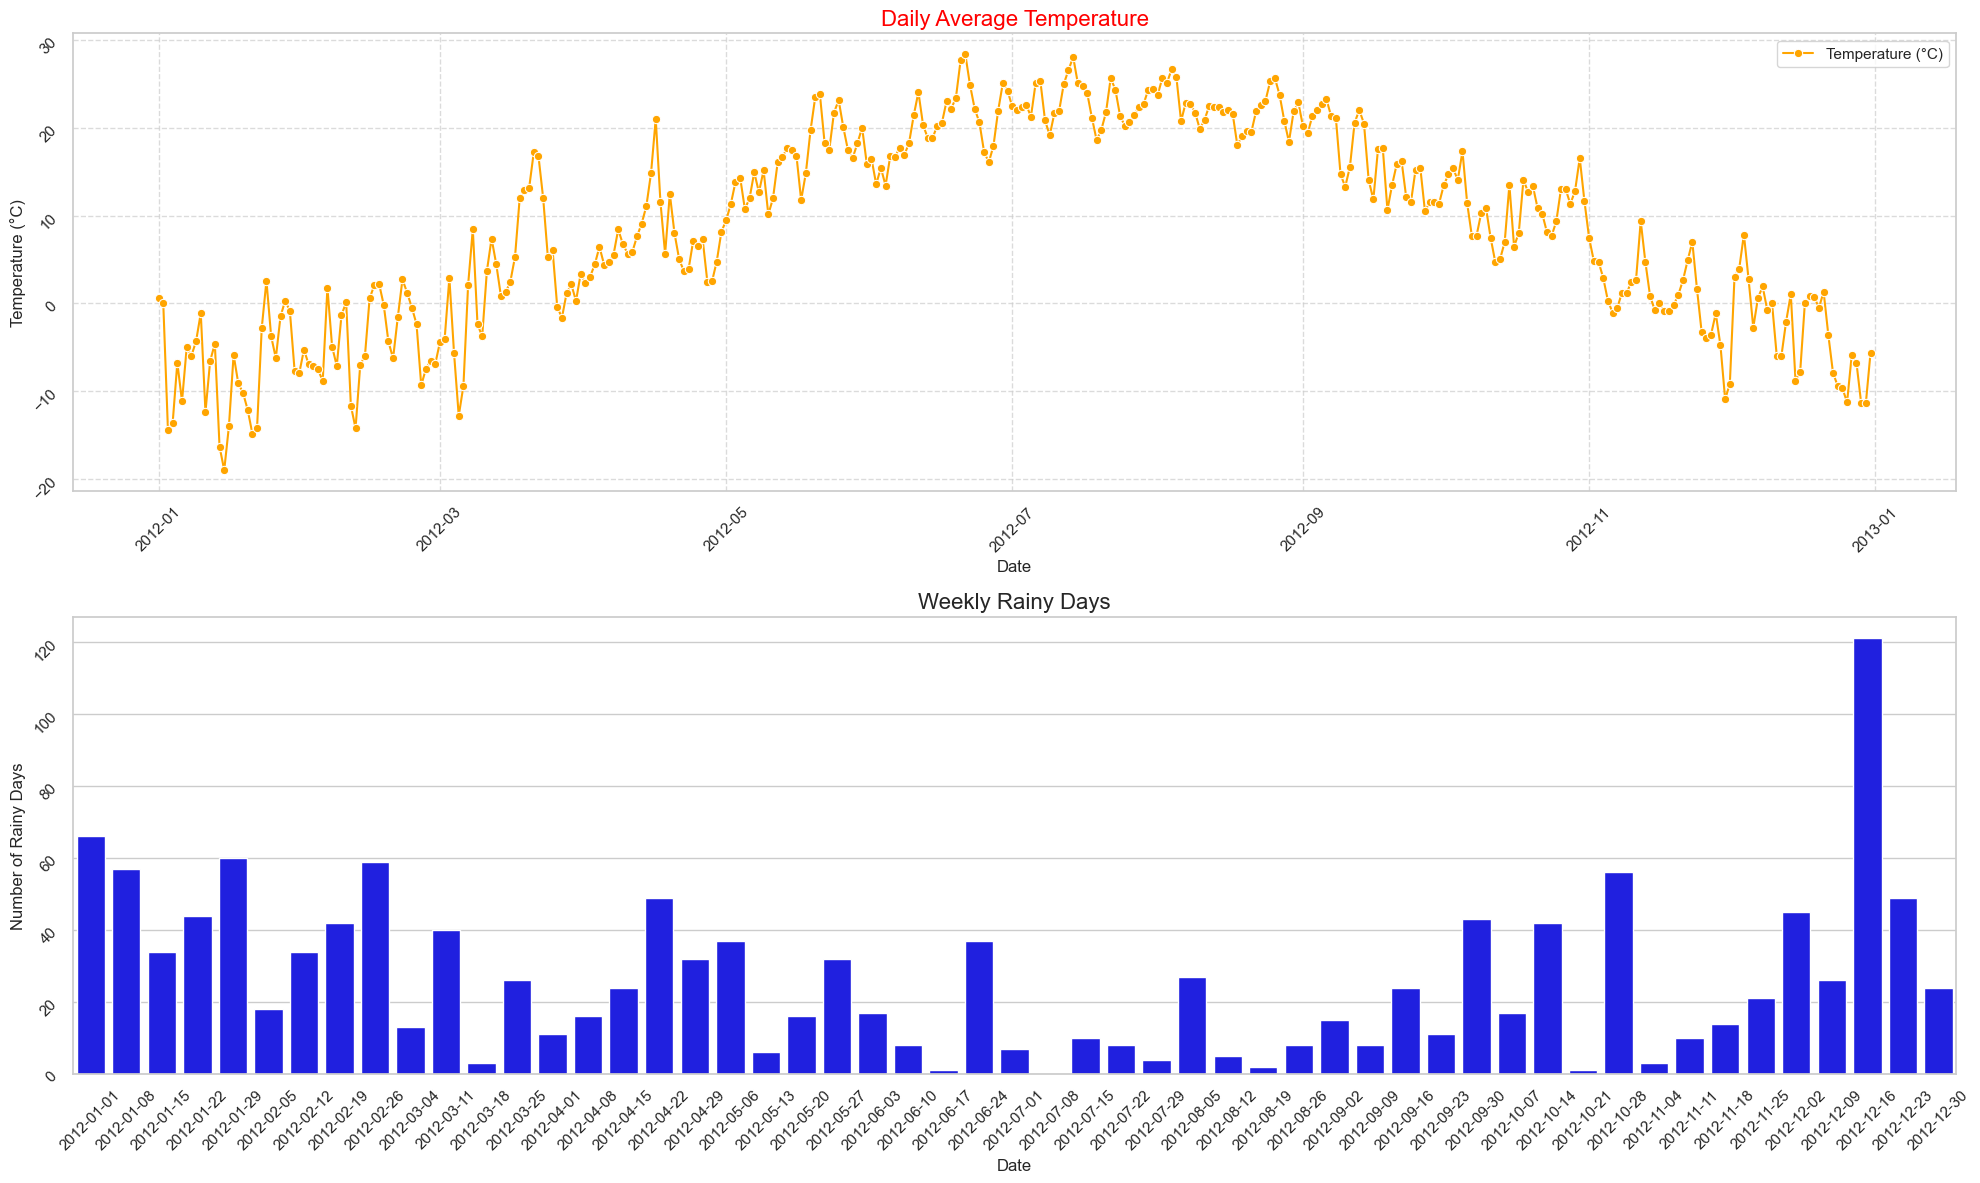

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,12), sharex=False)

#  Plot daily temperature as a line chart.
month = df['Temp_C'].resample('D').mean().reset_index()
sns.lineplot(data=month, x='Date/Time', y='Temp_C', marker='o', color='orange', label="Temperature (°C)", ax=ax1)
ax1.set_title("Daily Average Temperature", fontsize=16, color='red')
ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature (°C)")
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.legend()
ax1.tick_params(rotation=45)

# Weekly Rainy Days as a bar chart.
daily_rain = df['Rain'].resample('7D').sum().reset_index()
sns.barplot(x='Date/Time', y="Rain", data=daily_rain, color="blue", ax=ax2)
ax2.set_title("Weekly Rainy Days", fontsize=16)
ax2.set_xlabel("Date")
ax2.set_ylabel("Number of Rainy Days")
ax2.tick_params(rotation=45)

plt.tight_layout()
plt.show()
